/home/ban94gy/ban/local/lib/python3.5/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/ban94gy/ban/local/lib/python3.5/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


   	      	     fitness      	    size   
   	      	------------------	-----------
gen	nevals	max   	min       	max	min
0  	20000 	294749	0.00484253	15 	2  


Process ForkPoolWorker-119:
Process ForkPoolWorker-98:
Process ForkPoolWorker-102:
Process ForkPoolWorker-94:
Process ForkPoolWorker-120:
Process ForkPoolWorker-95:
Process ForkPoolWorker-118:
Process ForkPoolWorker-109:
Process ForkPoolWorker-96:


add(expe(mul(c2, c5)), sqrt(sqrt(c1)))


Process ForkPoolWorker-103:
Process ForkPoolWorker-108:
Process ForkPoolWorker-104:
Process ForkPoolWorker-101:
Process ForkPoolWorker-105:
Process ForkPoolWorker-99:
Process ForkPoolWorker-110:
Process ForkPoolWorker-97:
Process ForkPoolWorker-107:
Process ForkPoolWorker-100:
Process ForkPoolWorker-93:
Process ForkPoolWorker-92:
Process ForkPoolWorker-91:
Process ForkPoolWorker-106:
Process ForkPoolWorker-112:
Process ForkPoolWorker-111:
Process ForkPoolWorker-115:
Process ForkPoolWorker-114:
Process ForkPoolWorker-117:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-116:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent ca

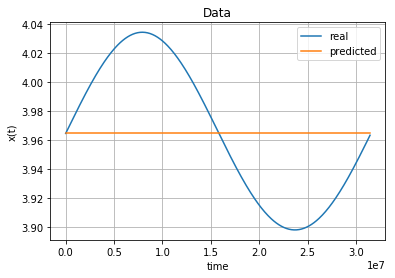

Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.5/mul

  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/pool.py", lin

  File "<string>", line 1, in <lambda>
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


In [6]:
import random
import numpy as np
import operator
import math
import pandas as pd
import time
import os
import dill
from sympy import *
from sympy.parsing import sympy_parser

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp
from scoop import futures
from pandas import DataFrame

from concurrent.futures import ProcessPoolExecutor
import matplotlib.pyplot as plt
import multiprocessing as mp


def plot_pred(hof):
    func = toolbox.compile(expr=hof[0])
    y_r = {'t' : [], 'real' : []}
    y_hat = {'t' : [], 'pred' : []}

    for t,x,y,c1,c2,c3,c4,c5,c6 in pts:
        y_hat['t'].append(t)
        y_hat['pred'].append(func(x,y,c1,c2,c3,c4,c5,c6)*3.964732818308)
        y_r['t'].append(t)
        y_r['real'].append(f[t])
        
    from matplotlib import pyplot as plt
    plt.plot(y_r['t'], y_r['real'])
    plt.plot(y_hat['t'], y_hat['pred'])

    plt.xlabel('time')  # x-axis
    plt.ylabel('x(t)')  # y-axis
    plt.title('Data')  # title
    plt.grid()  # grid
    plt.legend(['real','predicted'])
    plt.show()  # plot show

###################### Define functions############################
def safeDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1
    
def sqrt(left):
    if left>=0:
        return left**0.5
    else:
        return 0
    
def expe(left):
    if left>=0:
        return np.exp(-left)
    else:
        return 0


pset = gp.PrimitiveSet("MAIN", 8)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(expe, 1)
# pset.addPrimitive(safeDiv, 2)
pset.addPrimitive(sqrt,1)
# pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)

pset.renameArguments(ARG0='x')
pset.renameArguments(ARG1='y')

pset.renameArguments(ARG2='c1')
pset.renameArguments(ARG3='c2')
pset.renameArguments(ARG4='c3')
pset.renameArguments(ARG5='c4')
pset.renameArguments(ARG6='c5')
pset.renameArguments(ARG7='c6')

###################################################################
pool = mp.Pool(30)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)
#toolbox.register("map", futures.map)

#########################input DATA#################################

def evalSymbReg(individual, points):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)

    # Evaluate the mean squared error between the expression
    sqerrors = ((func(x,y,c1,c2,c3,c4,c5,c6)*3.964732818308 - f[t])**2 
                for t,x,y,c1,c2,c3,c4,c5,c6 in points)

    try:
        return max(sqerrors),
    except IndexError:
        return max(sqerrors),
    
toolbox.register("map", pool.map)

p = pd.read_csv('dp_pos.csv')
x = p['x']
y = p['y']

g = pd.read_csv('dp_vel.csv')
vx = g['vx']
vy = g['vy']
t = g['t']


f = {}
for i in range(len(t)):
    f[t[i]] = (vx[i]**2+vy[i]**2)*1e14


    
pts=[]

for i in range(len(t)):
    pts.append((t[i],x[i],y[i],1,2,3,4,5,0.5))
      
toolbox.register("evaluate", evalSymbReg, points=pts)
toolbox.register("select", tools.selTournament, tournsize=10)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=1, max_=3)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=4))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=4))

def main():
    pop = toolbox.population(n=20000)
    hof = tools.HallOfFame(1)
    
    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_size = tools.Statistics(len)
    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    
    mstats.register("min", np.min)
    mstats.register("max", np.max)
    
    
    #############################################C.O, Muta,Gener##########
    try:
        pop, log = algorithms.eaSimple(pop, toolbox, 0.8, 0.8, 1000, stats=mstats,
                                       halloffame=hof, verbose=True)
        print (hof[0])
        plot_pred(hof)
        return hof
    
    except MemoryError:
        print (hof[0])
        plot_pred(hof)
        return hof
    
    except KeyboardInterrupt:
        print (hof[0])
        plot_pred(hof)
        return hof



if __name__ == "__main__":    
    hof = main()


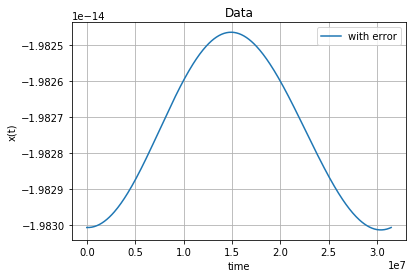

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

p = pd.read_csv('dp_pos.csv')

g = pd.read_csv('dp_vel.csv')



plt.plot(t, -3.964732818308e-14/np.sqrt(p['x']**2 + p['y']**2)+0.5*(g['vx']**2+g['vy']**2))
         
plt.xlabel('time')  # x-axis
plt.ylabel('x(t)')  # y-axis
plt.title('Data')  # title
plt.grid()  # grid
plt.legend(['with error','predicted','real'])
plt.show()  # plot show

In [4]:
from sympy import *
from sympy.parsing import sympy_parser


x = Symbol('x')
y = Symbol('y')


def add(a,b):
    return a+b

def expe(a):
    return exp(-a)

def mul(a,b):
    return a*b

def neg(a):
    return -a

def sub(a,b):
    return a-b

def sqrt(a):
    return a**0.5

def safeDiv(a,b):
    if b==0:
        return 1
    else:
        return a/b

expr_dict = {'add':add, 'expe':expe, 'sub':sub, 'mul':mul,'neg':neg,'sqrt':sqrt, 'safeDiv': safeDiv, 'c1':1, 'c2':2, 'c3':3, 'c4':4,'c5':5, 'c6':0.5}

d = sympy_parser.parse_expr(str(hof[0]), local_dict=expr_dict)
d

7*y*exp(-6) + 0.247403959254523 + exp(-cos(5))